# Verwendung der `MultiFit`-Klasse von *kafe2*

Das folgende, aus der Dokumentation von *kafe2* entnommene und weiter kommentierte, Code-Beispiel demonstriert die Verwendung der Klasse `MultiFit`aus dem *kafe2* Programm-Paket. Sie finden die Original-Dokumentation [hier](https://kafe2.readthedocs.io/en/latest/parts/beginners_guide.html#multifit).

## Physikalische Problemstellung

Das Beispiel basiert auf den Messpunkten der Datei `OhmsLawExperiment.dat`. Es geht um die Bestimmung des ohmschen Widerstands $R$ eines Drahts, aus einer Strom-Spannungs ($I(U)$)-Kennlinie. Die Darstellung von $I$ gegen $U$ fördert das überraschende Resultat zutage, dass zwischen $U$ und $I$ kein linearer Zusammenhang, wie er im Rahmen des ohmschen Gesetzes zu erwarten ist, besteht. Der Grund hierfür ist schnell gefunden: Er liegt in der Erwärmung des Drahts und der Temperaturabhängigkeit von $R$. 

**Die Daten bestehen aus drei Messgrößen, die korreliert geloggt wurden: $U$, $I$ und $T$.**

## Statistische Problemstellung

Auf Seiten der statistischen Analyse wird das Problem in diesem Beispiel durch eine Erweiterung des anzupassenden Modells gelöst. Dieses Modell hat die Form: 

$$
T(U) = p_{2}\,U^{2} + p_{1}\,U + p_{0};
\qquad
I(U) = \frac{U}{R_{0}\bigl(1+\alpha_{T}\,T(U)\bigr)}.
$$

Bei $T(U)$ handelt es sich um einen rein phänomenologischen Ansatz. Offenbar macht es keinen Sinn $R$ ohne Berücksichtigung von $T$ anzugeben, daher bestimmen wir $R_{0}$ als den Widerstand bei der Temperatur $T=0^{\circ}$ mit der Temperaturabhängigkeit

$$
R(T) = R_{0}\bigl(1+\alpha_{T}\,T(U)\bigr).
$$

Das gesamte Modell zur Beschreibung der Messreihe $\{(U_{i},\,I_{i},\,T_{i})\}$ hat mit $p_{0}$, $p_{1}$, $p_{2}$, $\alpha_{T}$ und $R_{0}$ fünf Parameter. Diesen stehen 20 Messpunkte gegenüber. 

Mit den Mitteln einer einfachen Anpassung können wir das Modell für $T(U)$ oder aber das Modell $I(U)$ unabhängig an die Daten anpassen. **Wir wollen jedoch eine gemeinsame Anpassung beider Modelle an den gesamten korrelierten Datensatz vornehmen.** Daraus wollen wir alle fünf Parameter des Modells und insbesondere den uns v.a. interessierenden Parameter $R_{0}$ bestimmen. Die Antwort auf diese Problemstellung ist die `MultiFit`-Klasse aus dem Programm-Paket *kafe2*. 


#########
# Fit 0 #
#########

    ########
    # Data #
    ########

        X Data  X Data Error  X Data Correlation Matrix                                    
        ======  ============  =============================================================
        0.5     0.2           [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
        1.0     0.2           [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
        1.5     0.2           [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
        2.0     0.2           [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
        2.5     0.2           [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
        3.0     0.2           [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
        3.5     0.2           [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
        4.0     0.2           [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
        4

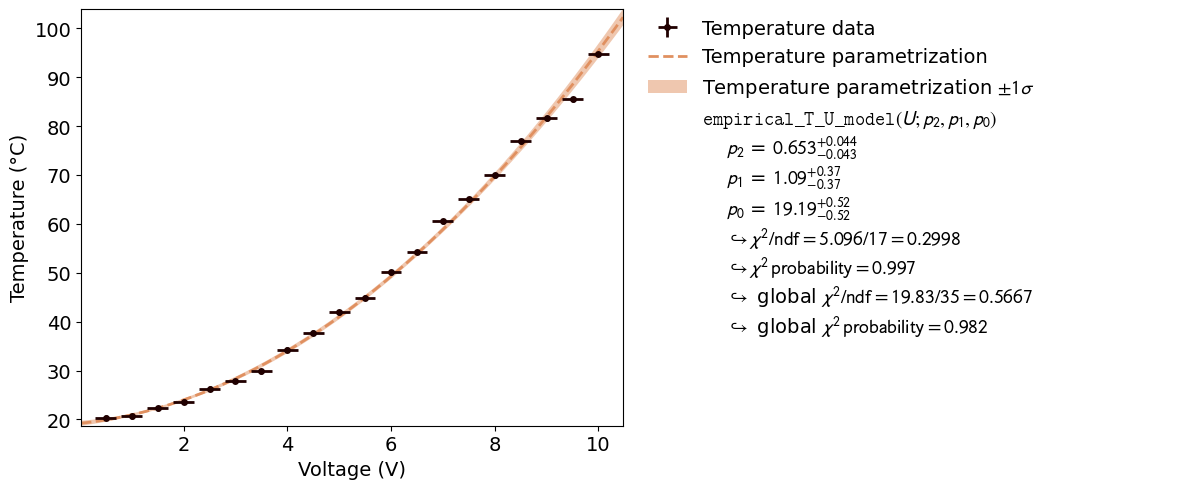

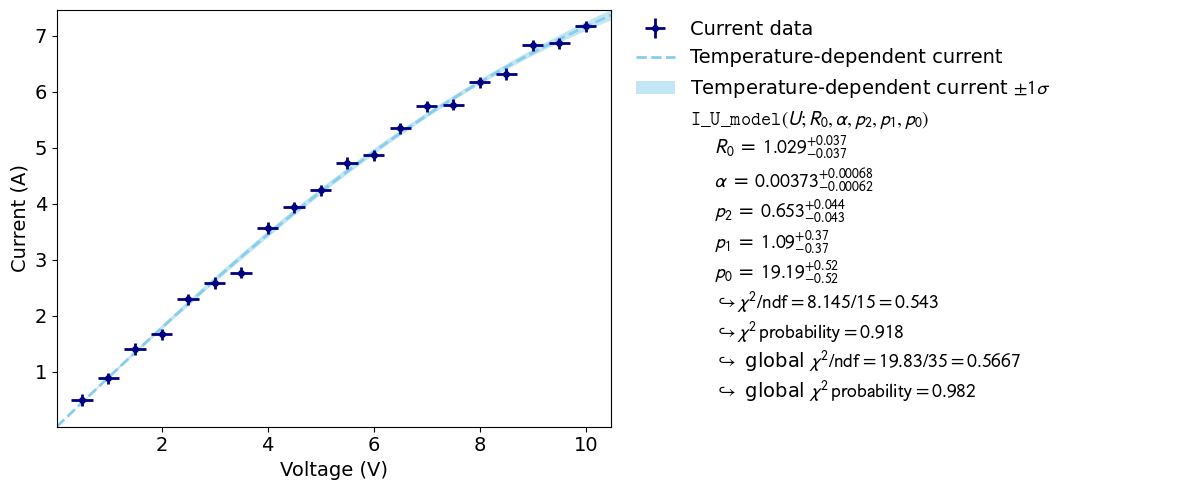

In [1]:
import numpy as np
from kafe2 import XYFit, MultiFit, Plot

# ------------------------------------------------------------------------
# Daten:
# ------------------------------------------------------------------------
U, I, T = np.loadtxt('OhmsLawExperiment.dat', unpack=True)
# Konvertiere T von Kelvin nach Grad Celsius
T -= 273.15      
# Unsicherheiten
dU, dI, dT = 0.2, 0.1, 0.5

# ------------------------------------------------------------------------
# Model:
# ------------------------------------------------------------------------
def empirical_T_U_model(U, p_2=1.0, p_1=1.0, p_0=0.0):
    return p_2*U**2+p_1*U+p_0
def I_U_model(U, R_0=1., alpha=0.004, p_2=1.0, p_1=1.0, p_0=0.0):
    _temperature = empirical_T_U_model(U, p_2, p_1, p_0)
    return U/(R_0*(1.0+_temperature*alpha))

# ------------------------------------------------------------------------
# Setup für die Anpassung des Modells and die Daten:
# ------------------------------------------------------------------------

# ------------------------------------------------------------------------
# Schritt 1: Definition einzelner XYFit Objekte (fit_0 und fit_1)
 
fit_0 = XYFit(
    # Daten: U und T 
    xy_data=[U, T],
    # Modell: empirical_T_U_model
    model_function=empirical_T_U_model
)
# Unsicherheiten auf T; Unsicherheiten auf U werden später eingeführt
fit_0.add_error(
    axis='y', 
    err_val=dT
)  
# Label für den Datensatz
fit_0.data_container.label = "Temperature data"
# Labels für die Spalten des Datensatzes
fit_0.data_container.axis_labels = (
    "Voltage (V)", 
    "Temperature (°C)"
)
# Label für das Modell
fit_0.model_label = "Temperature parametrization"

fit_1 = XYFit(
    # Data: U und I
    xy_data=[U, I],
    # Modell: I_U_model
    model_function=I_U_model
)
# Unsicherheiten auf I; Unsicherheiten auf U werden später eingeführt
fit_1.add_error(
    axis='y', 
    err_val=dI
)
# Label für den Datensatz
fit_1.data_container.label = "Current data"
# Labels für die Spalten des Datensatzes
fit_1.data_container.axis_labels = (
    "Voltage (V)", 
    "Current (A)"
)
# Label für das Modell
fit_1.model_label = "Temperature-dependent current"

# ------------------------------------------------------------------------
# Schritt 2: Definition des MultiFit Objekts aus fit_0 und fit_1
multi_fit = MultiFit(
    fit_list=[fit_0, fit_1], 
    minimizer='iminuit'
)
# Unsicherheiten auf U, als gemeinsame Unsicherheiten für fit_0 und fit_1
multi_fit.add_error(
    axis='x', 
    err_val=dU, 
    fits='all'
)
# Setze Startwert für Parameter alpha (über multi_fit)
#multi_fit.set_parameter_values(alpha=0.004)
# Latex Name für einen Modellparameter (über multi_fit)
#multi_fit.assign_parameter_latex_names(alpha=r'\alpha_\mathrm{T}')

# ------------------------------------------------------------------------
# Schritt 3: Anpassung und Diagnostik
multi_fit.do_fit()
multi_fit.report(asymmetric_parameter_errors=True)

plot = Plot(multi_fit, separate_figures=True)
plot.plot(asymmetric_parameter_errors=True)
#plot.save()  
plot.show()